In [ ]:
from Basefolder import basefolder
import time
import numpy as np
from Finder_1d import Finder_1d
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import seaborn as sns
from sklearn.cluster import DBSCAN
from Clustering_CAML import Clustering_CAML
import h5py
from DbscanLoop import DbscanLoop
from sklearn.neighbors import NearestNeighbors
import pickle
import pandas as pd

In [ ]:
def PlotScatter(labels=[],filename_add=""):
    
    XC_ = XC[mark];
    if(labels == []):
        labels = -1*np.ones((len(XC_),));
    
    fig,ax = plt.subplots(1,1,figsize=(6,6)); 
       
    mark_ = (labels==-1);
    ax.scatter(x=XC_[mark_,0],y=XC_[mark_,1],s=.4,c='grey',alpha=0.1);

    mark_ = (labels>=0);
    sns.scatterplot(x=XC_[mark_,0],y=XC_[mark_,1],hue=labels[mark_],palette='deep',linewidth=0,
                    s=2,legend=False,ax=ax);
    ax.set_aspect('equal');
    plt.savefig(outputfolder+"results_"+analysis_name+"_"+filename_add+".pdf",bbox_inches="tight");

In [7]:
analysis_name = "temp";
if(True):
    mainfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/';
    filename     = mainfolder+'AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';
    outputfolder = mainfolder + 'ReferenceCheck/';

    datascale = 158; #=81/512*1000
    #Define window to analyse

    #analysis_name = "dataWindow_2";
    #xInt = [22000,27000];#30000
    #yInt = [22000,27000];#30000      
    #xInt_params = [22000,27000];
    #yInt_params = [22000,27000];    
    
    analysis_name = "noiseAnalysis_withReference_1";
    xInt = [60000,70000];
    yInt = [50000,60000];    
    xInt_params = [22000,27000];
    yInt_params = [22000,27000];

    #To study everything:
#    xInt = [0,np.Infinity];
#    yInt = [0,np.Infinity];
elif(False):
    outputfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/';
    filename     = outputfolder +'XC_red.txt'
    datascale    = 1; #=81/512*1000
    #Define window to analyse
    xInt = [0,np.Infinity];
    yInt = [0,np.Infinity];

In [8]:
if(filename[-3:]=="txt"):
    XC = np.loadtxt(filename);
elif(filename[-4:]=="hdf5"):
#filename = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';
    f             = h5py.File(filename, 'r')    
    dset          = f['locs'];
    XC            = np.stack((dset["x"],dset["y"])).T    

XC        = np.unique(XC,axis=0);
XC        = datascale*XC;

mark = (XC[:,0]>xInt[0])*(XC[:,0]<xInt[1])*(XC[:,1]>yInt[0])*(XC[:,1]<yInt[1]);
mark_params = (XC[:,0]>xInt_params[0])*(XC[:,0]<xInt_params[1])*(XC[:,1]>yInt_params[0])*(XC[:,1]<yInt_params[1]);
#XC   = XC[mark,:];

In [5]:
if(True):
    FD      = Finder_1d(algo="DbscanLoop");
    labels  = FD.fit(XC[mark,:],XC[mark_params,:]);    
    with open(outputfolder+"results_"+analysis_name+'.pickle','wb') as handle:
        pickle.dump({'FD':FD}, handle,protocol=pickle.HIGHEST_PROTOCOL)       

Boundaries for sigma    : 14.07426813740076 , 133.4552450948347
Postprocessing..
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Computing similarity scores: 54.37 seconds
Selected threshold , sigma : 3.0 , 50.89322912661465


In [10]:
with open(outputfolder+'results_dataWindow_2.pickle', 'rb') as fr:
    FD_load = pickle.load(fr);
FD = FD_load['FD'];    

In [11]:
with open(outputfolder+'results_noiseAnalysis_withReference_1.pickle', 'rb') as fr:
    FD_load_ref = pickle.load(fr);
FD_ref = FD_load_ref['FD'];

<ipython-input-43-c61d9de2263c>:3: RuntimeWarning: divide by zero encountered in true_divide
  df1['no_clusters'] = np.asarray(df1['no_clusters'])/np.asarray(df1_ref['no_clusters'])
<ipython-input-43-c61d9de2263c>:3: RuntimeWarning: invalid value encountered in true_divide
  df1['no_clusters'] = np.asarray(df1['no_clusters'])/np.asarray(df1_ref['no_clusters'])
<ipython-input-43-c61d9de2263c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['no_clusters'] = np.asarray(df1['no_clusters'])/np.asarray(df1_ref['no_clusters'])


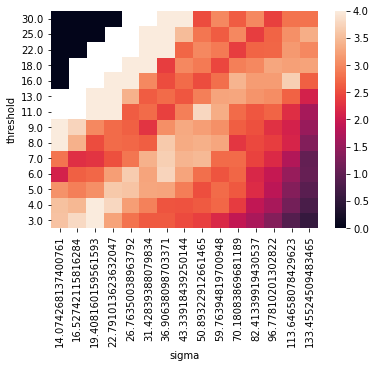

In [43]:
df1     = FD.phasespace[['sigma', 'threshold','no_clusters']]
df1_ref = FD_ref.phasespace[['sigma', 'threshold','no_clusters']]
df1['no_clusters'] = np.asarray(df1['no_clusters'])/np.asarray(df1_ref['no_clusters'])

df1 = df1.fillna(0)

heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,vmin=0,vmax=4);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_no_clusters_ratio.pdf",bbox_inches="tight");

<ipython-input-36-0470ea2b8879>:3: RuntimeWarning: divide by zero encountered in true_divide
  df1['similarityScore'] = np.asarray(df1['similarityScore'])/np.asarray(df1_ref['similarityScore'])
<ipython-input-36-0470ea2b8879>:3: RuntimeWarning: invalid value encountered in true_divide
  df1['similarityScore'] = np.asarray(df1['similarityScore'])/np.asarray(df1_ref['similarityScore'])
<ipython-input-36-0470ea2b8879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['similarityScore'] = np.asarray(df1['similarityScore'])/np.asarray(df1_ref['similarityScore'])


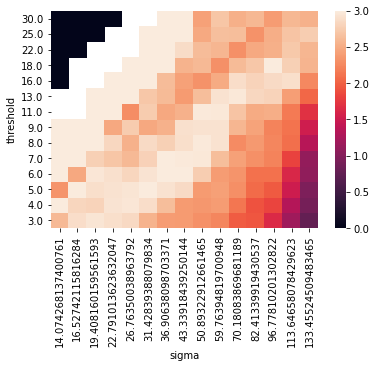

In [36]:
df1     = FD.phasespace[['sigma', 'threshold','similarityScore']]
df1_ref = FD_ref.phasespace[['sigma', 'threshold','similarityScore']]
df1['similarityScore'] = np.asarray(df1['similarityScore'])/np.asarray(df1_ref['similarityScore'])

df1 = df1.fillna(0)

heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,vmin=0,vmax=3);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore_ratio.pdf",bbox_inches="tight");

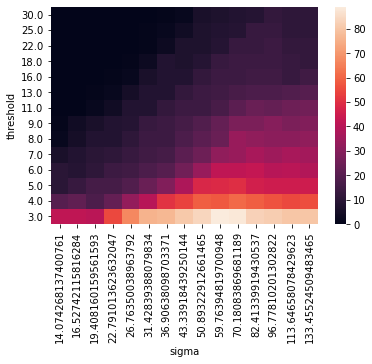

In [37]:
df1 = FD_ref.phasespace[['sigma', 'threshold','no_clusters']]
heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_noClusters.pdf",bbox_inches="tight");

/Users/andreas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


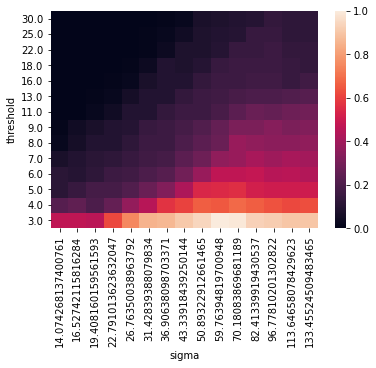

In [39]:
df1 = FD_ref.phasespace[['sigma', 'threshold','no_clusters']]
df1.loc[:,'no_clusters'] = df1.loc[:,'no_clusters']/np.max(df1.loc[:,'no_clusters']);
heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_noClusters_norm.pdf",bbox_inches="tight");

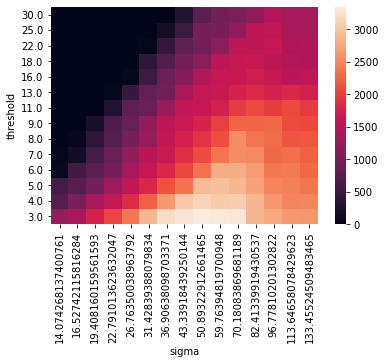

In [40]:
df1 = FD_ref.phasespace[['sigma', 'threshold','similarityScore']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore.pdf",bbox_inches="tight");

In [ ]:
df1 = FD.phasespace[['sigma', 'threshold','similarityScore_mod']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore_mod', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore_over_noise.pdf",bbox_inches="tight");

In [ ]:
df1_ref = FD_ref.phasespace[['sigma', 'threshold','similarityScore']]

In [ ]:
np.asarray(df1['similarityScore'])

In [ ]:
df1['similarityScore'] = np.asarray(df1['similarityScore'])/np.asarray(df1_ref['similarityScore'])

In [ ]:
df1

In [ ]:
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
#plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore_relative.pdf",bbox_inches="tight");

In [ ]:
heatmap1_data = pd.pivot_table(df1_ref, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore_relative.pdf",bbox_inches="tight");

In [ ]:
for th in np.unique(FD.phasespace['threshold']):
    mark = (FD.phasespace['threshold'] == th);
    PS_sel = FD.phasespace.loc[mark,:];
    idx_max = PS_sel['similarityScore'].idxmax();
    PlotScatter(PS_sel.loc[idx_max,'labels'],str(th));

In [ ]:
PS_sel.loc[:,'labels']